## IRIS DATASET
### A beginner level Machine learning dataset,let's do it..

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle
import joblib


### 1. Importing Dataset
### The Iris Dataset downloaded from Kaggle.com 

In [2]:
iris_df=pd.read_csv('IRIS.csv') #Loading Dataset


In [3]:
iris_df.head(7) #Showing the first 7 row

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [4]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

## 2.Analysing the Data

In [5]:
iris_df.shape

(150, 5)

In [6]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


so,There are no missing Value..
let's Check the basic information about the Dataset

In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


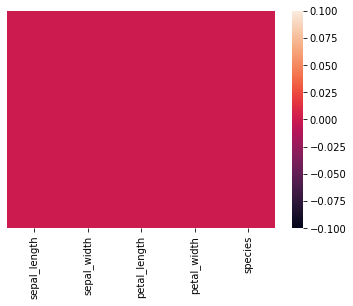

In [8]:
sns.heatmap(iris_df.isnull(),yticklabels=False) #Generating heatmap for missing values
plt.show()

In [9]:
iris_df.isnull().sum() #Numerically checking the null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

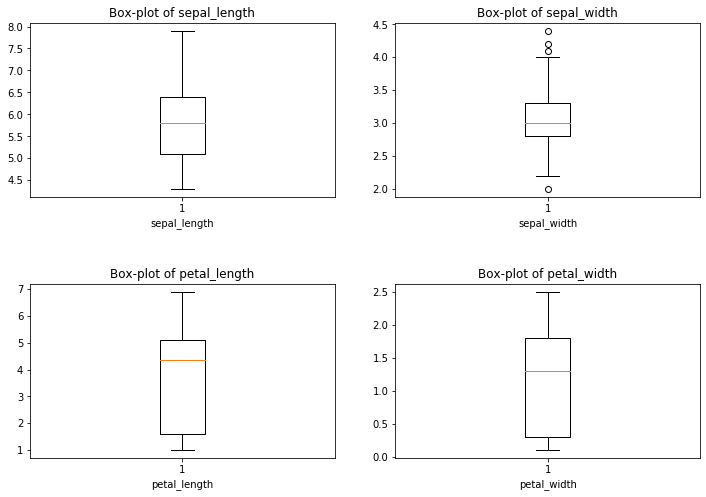

In [10]:
i = 1
plt.figure(figsize = (12 , 8)) #setting the figure size
plt.subplots_adjust(hspace = 0.5) #adjusting the subplots to provide space between them

for column in iris_df.drop('species' , axis = 1).columns:
    
    plt.subplot(2 , 2 , i)
    
    plt.boxplot(iris_df[str(column)]) #generating boxplots of each features
    plt.xlabel(str(column))
    plt.title('Box-plot of '+str(column))
    
    i = i + 1
                   

so sepal_width had outliers.we need to see it

## Feature Modification

In [11]:
y=np.array(iris_df['species']) #extracting the Target
X=np.array(iris_df.drop('species',axis=1)) #Extracting the features

Now split the data into train,cv,test set

In [12]:
#splitting the train and cv and test set

X_train , X_1 , y_train ,y_1 = train_test_split(X , y , test_size = 0.8 , random_state = 0) 

X_cv , X_test , y_cv , y_test = train_test_split(X_1 , y_1 , test_size = 0.5 , random_state = 0)

## 4.Defining the Model

In [13]:
lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

lr.fit(X_train , y_train)
y_pred = lr.predict(X_train)

print('The f1 score is', f1_score(y_train , y_pred , average = 'weighted')) #finding the f1 score

The f1 score is 0.9333333333333333


In [14]:
#defining the parameters

params = {'multi_class': ['multinomial'],
          'solver' : ['newton-cg', 'lbfgs'],
          'penalty' : ['l2'],
          'C':[0.1 , 0.3 , 1 , 3]
         }

#initializing the GridSearchCV object

grid = GridSearchCV(LogisticRegression(),
                   params,
                   cv = 5,
                   n_jobs = -1)

grid.fit(X_train , y_train) #fitting the grid

grid.best_estimator_ #finding the best estimator

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#Generating confusion matrix
conf_matrix = confusion_matrix(y_train , y_pred , labels = ['Iris-versicolor' , 'Iris-virginica' , 'Iris-setosa'])
conf_matrix

array([[10,  1,  0],
       [ 1,  8,  0],
       [ 0,  0, 10]], dtype=int64)

The error is too smal
lets look at the error od confusion matrix

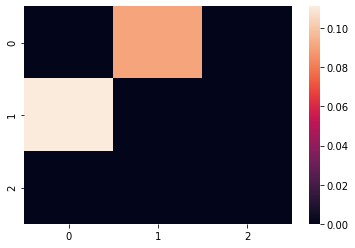

In [18]:
row_sum = np.sum(conf_matrix , axis = 1 , keepdims = True) #summing the rows

np.fill_diagonal(conf_matrix , 0) #filling diagonal with 0 to remove the correct values

conf_matrix = conf_matrix / row_sum

sns.heatmap(conf_matrix) #generating a heatmap
plt.show()


The confusion matrix shows 'Iris-virginica' is misclassified as 'Iris-versicolor' a lot of the times

In [19]:
y_cv_pred = lr.predict(X_cv) #predicting the y values for cross validation

print('F1 score of CV set is' , f1_score(y_cv , y_cv_pred , average = 'weighted'))
print('F1 score of Train set is' , f1_score(y_train , y_pred , average = 'weighted'))

F1 score of CV set is 0.949327731092437
F1 score of Train set is 0.9333333333333333


Its time we save the model using the joblib package.

In [20]:
joblib.dump(lr, 'iris_model.pkl')  #saving the model

['iris_model.pkl']